Write a python script/function, that rotates an image by a given angle. The solution should consist of the following steps:

load an image,
for a given rotation angle, compute the corners of the new image and the new image (rectangular) bounding-box,
preallocate the array for the new image,
iterate all pixels in the new image, fill-in their intensities/colors from the original image
pixel intensity look-up must use geometric transformation of pixel coordinates (the rotation)
the image should be rotated around its center, so image coordinates origin (0,0 is in the upper-left corner) must be properly handled
Some tips:

The transformed coordinates must be converted to integer numbers to be used as indices.
When looking-up the pixel value in the original image, the image borders must be checked and the lookup must be done only for coordinates inside
The new image can be pre-allocated as new_img = np.zeros( img.shape ). This works both for gray-scale (2D) and colour (3D) image.
The pixel assignment can be done (provided there are correct x1, y1, x2, y2) as new_img[y2,x2] = img[y1,x1]. Works for both gray-scale and RGB cases. In the first case, a single value is assigned, in the second case, the RGB vector is assigned.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


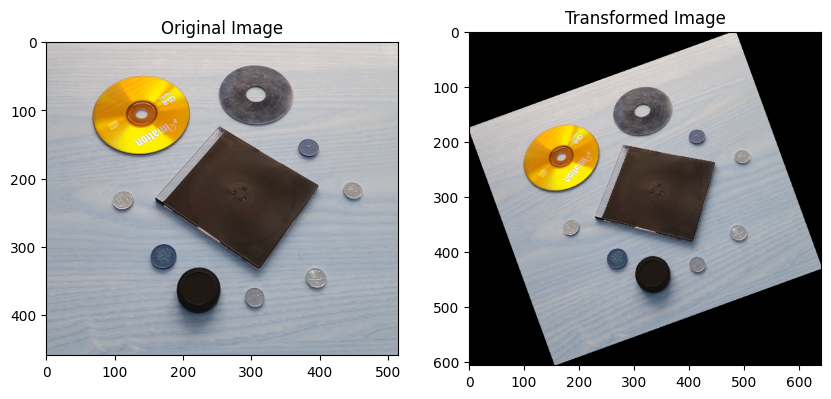

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    """
    Rotates an image by a given angle around its center.

    Args:
      image: The input image (grayscale or RGB).
      angle: The angle in degrees by which the image should be rotated.

    Returns:
      The rotated image.
    """
    # Converting angle to radians
    angle_rad = math.radians(angle)

    # Getting height & width of original img
    h, w = image.shape[:2]

    # Computing center of img
    center_x, center_y = w // 2, h // 2

    # Computing new bounding box size after rotation
    cos_theta = abs(math.cos(angle_rad))
    sin_theta = abs(math.sin(angle_rad))
    new_w = int(w * cos_theta + h * sin_theta)
    new_h = int(h * cos_theta + w * sin_theta)

    # Preallocating new image (filling it with zeros for black background)
    if len(image.shape) == 2:  # Grayscale image (2D)
        new_img = np.zeros((new_h, new_w), dtype=image.dtype)
    else:  # Color image (3D)
        new_img = np.zeros((new_h, new_w, 3), dtype=image.dtype)

    # Iterating it over each pixel in new image
    for y2 in range(new_h):
        for x2 in range(new_w):
            # Translating coordinates to origin (center of new image)
            x2_centered = x2 - new_w // 2
            y2_centered = y2 - new_h // 2

            # Apply the inverse rotation to find corresponding pixel in original img
            x1_centered = int(center_x + (x2_centered * math.cos(-angle_rad) - y2_centered * math.sin(-angle_rad)))
            y1_centered = int(center_y + (x2_centered * math.sin(-angle_rad) + y2_centered * math.cos(-angle_rad)))

            # Checking if original coordinates (x1, y1) are within bounds of original img
            if 0 <= x1_centered < w and 0 <= y1_centered < h:
                # Copying pixel from original img to new img
                new_img[y2, x2] = image[y1_centered, x1_centered]

    return new_img

# Loading image
image_path = "/content/drive/MyDrive/3DCV/cd_box.png"
image = cv2.imread(image_path)

# Rotating img by a specific angle
rotated_image = rotate_image(image, -20)

# Displaying original & rotated img
plt.figure(figsize=(10, 5))

# Displaying original img
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray" if len(image.shape) == 2 else None)
plt.title("Original Image")
plt.axis('on')

# Displaying rotated img
plt.subplot(1, 2, 2)
plt.imshow(rotated_image, cmap="gray" if len(rotated_image.shape) == 2 else None)
plt.title("Transformed Image")
plt.axis('on')

plt.show()

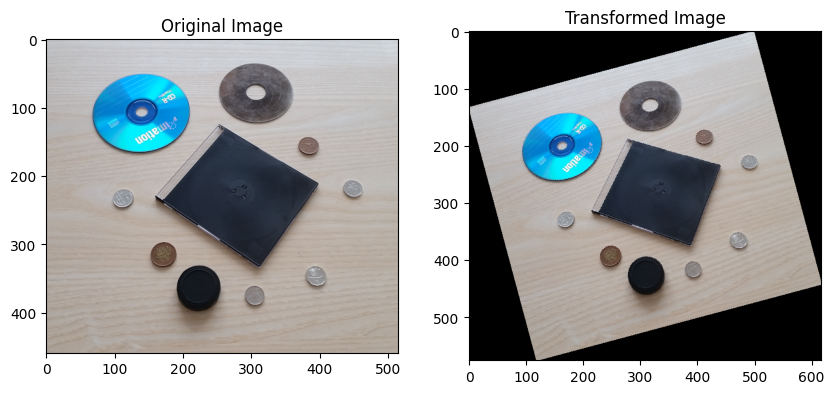

In [ ]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt

def rotate_image(image, angle):
    # Converting angle to radians
    angle_rad = math.radians(angle)

    # Getting height & width of original img
    h, w = image.shape[:2]

    # Computing center of img
    center_x, center_y = w // 2, h // 2

    # Computing new bounding box size after rotation
    cos_theta = abs(math.cos(angle_rad))
    sin_theta = abs(math.sin(angle_rad))
    new_w = int(w * cos_theta + h * sin_theta)
    new_h = int(h * cos_theta + w * sin_theta)

    # filling with 0's for black background
    if len(image.shape) == 2:  # Grayscale image - 2D
        new_img = np.zeros((new_h, new_w), dtype=image.dtype)
    else:  # Color image - 3D
        new_img = np.zeros((new_h, new_w, 3), dtype=image.dtype)

    # Iterating it over each pixel in new img
    for y2 in range(new_h):
        for x2 in range(new_w):
            # Translating coordinates to origin (center of new image)
            x2_centered = x2 - new_w // 2
            y2_centered = y2 - new_h // 2

            # Applying inverse rotation to find corresponding pixel in original img
            x1_centered = int(center_x + (x2_centered * math.cos(-angle_rad) - y2_centered * math.sin(-angle_rad)))
            y1_centered = int(center_y + (x2_centered * math.sin(-angle_rad) + y2_centered * math.cos(-angle_rad)))

            # Checking if original coordinates (x1, y1) are within bounds of original img
            if 0 <= x1_centered < w and 0 <= y1_centered < h:
                # Copying pixel from original image to new img
                new_img[y2, x2] = image[y1_centered, x1_centered]

    return new_img

image_path = "/content/drive/MyDrive/3DCV/cd_box.png"
image = cv2.imread(image_path)

# Conversion of image from BGR to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Rotating img by a specific angle
rotated_image = rotate_image(image_rgb, -15)

plt.figure(figsize=(10, 5))

# original image
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Original Image")
plt.axis('on')

#rotated image
plt.subplot(1, 2, 2)
plt.imshow(rotated_image)
plt.title("Transformed Image")
plt.axis('on')

plt.show()